In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('energy_dataset.csv')
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [ ]:
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [ ]:
# Count the total number of null values
total_null_values = df.isnull().sum().sum()

In [ ]:
total_null_values

70529

In [ ]:
df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [ ]:
# Count the total number of null values in the load_actual column
total_null_values_in_load_actual = df['total load actual'].isnull().sum()

In [ ]:
total_null_values_in_load_actual, len(df)

(36, 35064)

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

def impute_dataset(dataset, imputation_method='mean'):
    """
    Impute missing values in a dataset using the specified imputation method.

    Parameters:
    - dataset (pd.DataFrame): The input dataset with missing values.
    - imputation_method (str): The imputation method ('mean', 'median', 'mode', etc.).

    Returns:
    - pd.DataFrame: The imputed dataset.
    """

    # Identify columns with missing values
    columns_with_missing = dataset.columns[dataset.isnull().any()].tolist()

    if not columns_with_missing:
        print("No missing values found in the dataset.")
        return dataset

    # Initialize the imputer
    imputer = SimpleImputer(strategy=imputation_method)

    # Fit and transform the imputer on the dataset
    dataset.loc[:,columns_with_missing] = imputer.fit_transform(dataset[columns_with_missing])

    print("Missing values imputed using {}.".format(imputation_method))

    return dataset

# Impute missing values using mean imputation
imputed_df = impute_dataset(df[['time', 'total load actual']], imputation_method='mean')

Missing values imputed using mean.


In [ ]:
# Count the total number of null values
total_null_values = imputed_df.isnull().sum().sum()

In [ ]:
total_null_values

0

In [ ]:
def create_dataset(data, look_back=1):
    X = [[data[i+j] for i in range(look_back)] for j in range(len(data)-look_back)]
    X = np.array(X)
    y = [data[i] for i in range(len(data)-look_back)]
    y = np.array(y)
    print(f'X shape = {X.shape} and y shape = {y.shape}')
    return X,y

In [ ]:
look_back = 25 # Changing may improve result

data = imputed_df['total load actual'].astype('float32')
data = np.reshape(data, (-1, 1)) # reshape to one feature; required for the models

scaler = MinMaxScaler(feature_range=(0, 1)) # Min Max scaler
data = scaler.fit_transform(data) # fit and transform the dataset

X,y = create_dataset(data, look_back) # windowed dataset

X shape = (35039, 25, 1) and y shape = (35039, 1)


In [ ]:
X1, X_test, y1, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X1, y1, test_size=0.2, random_state = 42)

print(f'Training dataset shape: {X_train.shape}')

Training dataset shape: (22424, 25, 1)


Epoch 1/50
45/45 - 8s - loss: 0.3009 - accuracy: 0.0000e+00 - val_loss: 0.1942 - val_accuracy: 0.0000e+00 - 8s/epoch - 175ms/step
Epoch 2/50
45/45 - 1s - loss: 0.1673 - accuracy: 0.0000e+00 - val_loss: 0.1512 - val_accuracy: 0.0000e+00 - 864ms/epoch - 19ms/step
Epoch 3/50
45/45 - 1s - loss: 0.1425 - accuracy: 0.0000e+00 - val_loss: 0.1329 - val_accuracy: 0.0000e+00 - 791ms/epoch - 18ms/step
Epoch 4/50
45/45 - 1s - loss: 0.1209 - accuracy: 0.0000e+00 - val_loss: 0.1046 - val_accuracy: 0.0000e+00 - 784ms/epoch - 17ms/step
Epoch 5/50
45/45 - 1s - loss: 0.0908 - accuracy: 0.0000e+00 - val_loss: 0.0799 - val_accuracy: 0.0000e+00 - 753ms/epoch - 17ms/step
Epoch 6/50
45/45 - 1s - loss: 0.0840 - accuracy: 0.0000e+00 - val_loss: 0.0732 - val_accuracy: 0.0000e+00 - 731ms/epoch - 16ms/step
Epoch 7/50
45/45 - 1s - loss: 0.0750 - accuracy: 0.0000e+00 - val_loss: 0.0676 - val_accuracy: 0.0000e+00 - 749ms/epoch - 17ms/step
Epoch 8/50
45/45 - 1s - loss: 0.0700 - accuracy: 0.0000e+00 - val_loss: 0.0627

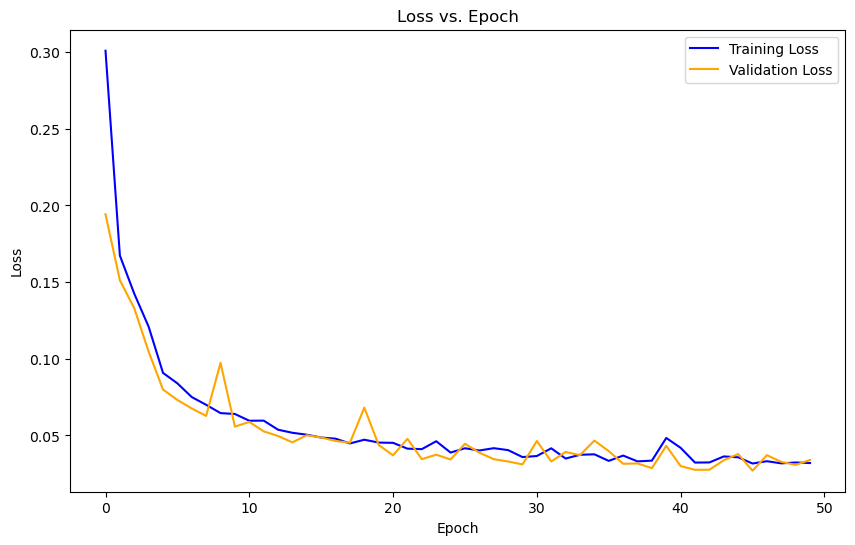

In [ ]:
model = Sequential()
model.add(LSTM((50),batch_input_shape=(None, look_back, 1),return_sequences=False))
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs= 50, batch_size=500, verbose=2, validation_data=(X_val, y_val))

# Access the loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss vs. epoch curve
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='orange')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
no_of_test_samples = 50
predict = model.predict(X_test[0:no_of_test_samples])
final_predictions = [np.mean(x) for x in predict]

2/2 [==============================] - 1s 8ms/step


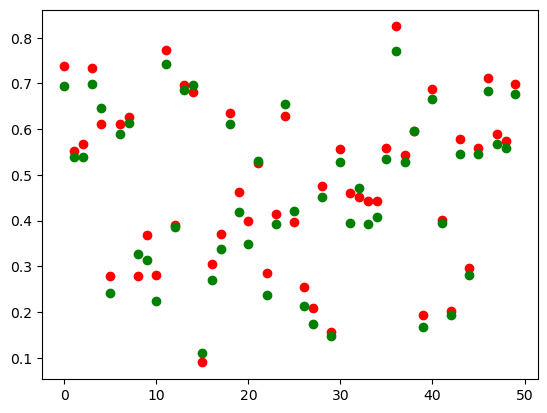

In [ ]:
plt.scatter(range(no_of_test_samples),y_test[0:no_of_test_samples],c='red')
plt.scatter(range(no_of_test_samples), final_predictions,c='green')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions on the test set
predictions = model.predict(X_test)
predictions = [np.mean(x) for x in predictions]

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Optionally, calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae} MWh')
print(f'Mean Squared Error (MSE): {mse} MWh')
print(f'Root Mean Squared Error (RMSE): {rmse} MWh')

219/219 [==============================] - 1s 7ms/step
Mean Absolute Error (MAE): 0.03040154278278351 MWh
Mean Squared Error (MSE): 0.0013240783009678125 MWh
Root Mean Squared Error (RMSE): 0.036387886852025986 MWh
